In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.simplefilter("ignore")

In [2]:
db=pd.read_csv("C:\\Users\\SHAIKH MD KASHIF\\Downloads\\DS_Assignment - internship\\Screening Test - DS\\iris.csv")
target_variable=db["petal_width"]
target_variable.unique()

array([0.2, 0.4, 0.3, 0.1, 0.5, 0.6, 1.4, 1.5, 1.3, 1.6, 1. , 1.1, 1.8,
       1.2, 1.7, 2.5, 1.9, 2.1, 2.2, 2. , 2.4, 2.3])

# Treating Outliers :-

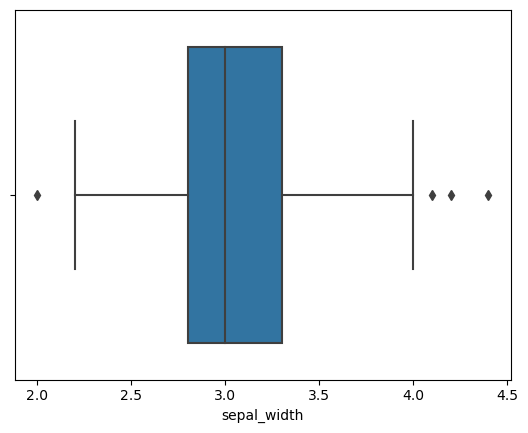

In [3]:
sns.boxplot(db["sepal_width"])
plt.show()

In [4]:
## Winsorization Technoique
from feature_engine.outliers import Winsorizer
win=Winsorizer(capping_method="iqr",fold=1.5,tail="both",variables="sepal_width")
db["sepal_width"]=win.fit_transform(db[["sepal_width"]])

In [5]:
db=pd.get_dummies(db,columns=["species"],drop_first=True)

In [6]:
db.head()

,sepal_length,sepal_width,petal_length,petal_width,species_Iris-versicolor,species_Iris-virginica
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
scalar= StandardScaler()
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [8]:
x=db.drop("petal_width",axis=1)
y=target_variable

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=182)

In [10]:
Pipelinedct={0:"Linear Regression",1:"Lasso",2:"Ridge",3:"ElasticNet",4:"RandomForestRegressor"}

In [11]:
Pipelinedct={0:"Linear Regression",1:"Lasso",2:"Ridge",3:"ElasticNet",4:"RandomForestRegressor"}
LinearRegressionPipeline=Pipeline([("Linear Regression",LinearRegression())])
LassoPipeline=Pipeline([("Lasso",Lasso())])
RidgePipeline=Pipeline([("Ridge",Ridge())])
ElasticNetPipeline=Pipeline([("ElasticNet",ElasticNet())])
RandomForestRegressorPipeline=Pipeline([("RFG",RandomForestRegressor())])

In [12]:
pipeline=[LinearRegressionPipeline,LassoPipeline,RidgePipeline,ElasticNetPipeline,RandomForestRegressorPipeline]

In [13]:
for model in pipeline:
    model.fit(x_train,y_train)

In [14]:
for i, model in enumerate(pipeline):
    print("{} Test Accuracy: {}".format(Pipelinedct[i], model.score(x_test, y_test)))
    print("{} Train Accuracy: {}".format(Pipelinedct[i], model.score(x_train, y_train)))


Linear Regression Test Accuracy: 0.9389847027791729
Linear Regression Train Accuracy: 0.9567254067418405
Lasso Test Accuracy: 0.30916608106455146
Lasso Train Accuracy: 0.3901873078261632
Ridge Test Accuracy: 0.931774186968731
Ridge Train Accuracy: 0.9522309647679759
ElasticNet Test Accuracy: 0.6531392293436931
ElasticNet Train Accuracy: 0.731099961226549
RandomForestRegressor Test Accuracy: 0.9233829550223585
RandomForestRegressor Train Accuracy: 0.9916255964550517


# Applying PCA (Principal Component Analysis) :-

In [16]:
x=db.drop("petal_width",axis=1)
y=target_variable
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=182)
x_train=scalar.fit_transform(x_train)
x_test=scalar.transform(x_test)

In [17]:
PipelineDictionary={0:"Linear Regression",1:"Lasso",2:"Ridge",3:"ElasticNet",4:"RandomForestRegressor"}

In [18]:
LinearRegressionPipeline=Pipeline([("myscaler",StandardScaler()),
                                     ("mypca",PCA(n_components=3)),
                                     ("Linear_Regression",LinearRegression())])
LassoPipeline=Pipeline([("myscaler",StandardScaler()),
                               ("mypca",PCA(n_components=3)),
                              ("Lasso_Regression",Lasso())])
RidgePipeline=Pipeline([("myscaler",StandardScaler()),
                                        ("mypca",PCA(n_components=3)),
                                        ("RidgeRegression",Ridge())])
ElasticNetPipeline=Pipeline([("myscaler",StandardScaler()),
                            ("mypca",PCA(n_components=3)), 
                            ("ElasticNet",ElasticNet())])
RandomForestRegressorPipeline=Pipeline([("myscaler",StandardScaler()),
                                        ("mypca",PCA(n_components=3)),
                                        ("RFG",RandomForestRegressor())])                            

In [19]:
mypipeline=[LinearRegressionPipeline,LassoPipeline,RidgePipeline,ElasticNetPipeline,RandomForestRegressorPipeline]

In [20]:
for model in mypipeline:
    model.fit(x_train,y_train)

In [21]:
for i,model in enumerate(mypipeline):
    print("{} Test Accuracy:{}".format(PipelineDictionary[i],model.score(x_test,y_test)))
    print("{} Train Accuracy:{}".format(PipelineDictionary[i],model.score(x_train,y_train)))

Linear Regression Test Accuracy:0.8588072263231191
Linear Regression Train Accuracy:0.9099868342254354
Lasso Test Accuracy:0.1622263358988255
Lasso Train Accuracy:0.242403702873475
Ridge Test Accuracy:0.8583376316584874
Ridge Train Accuracy:0.9099770037815349
ElasticNet Test Accuracy:0.575966713054747
ElasticNet Train Accuracy:0.6601494692765107
RandomForestRegressor Test Accuracy:0.9110018503248127
RandomForestRegressor Train Accuracy:0.9906234482162612


# Conclusison:-  Without PCA along with Removal of Outliers:- 

By applying various of Algorithms we got the results as :- // 

              //       
Linear Regression Test Accuracy: 0.9389847027791729               
Linear Regression Train Accuracy: 0.9567254067418405       //      
Lasso Test Accuracy: 0.30916608106455146                          
Lasso Train Accuracy: 0.3901873078261632                  //      

Ridge Test Accuracy: 0.931774186968731                           
Ridge Train Accuracy: 0.9522309647679759                  //       

ElasticNet Test Accuracy: 0.6531392293436931               //     
ElasticNet Train Accuracy: 0.731099961226549                     

RandomForestRegressor Test Accuracy: 0.9233829550223585            
RandomForestRegressor Train Accuracy: 0.9916255964550517    //    

# With PCA along with Removal of Outliers:- 

Linear Regression Test Accuracy:0.8588072263231191
Linear Regression Train Accuracy:0.9099868342254354  

Lasso Test Accuracy:0.1622263358988255   
Lasso Train Accuracy:0.242403702873475      

Ridge Test Accuracy:0.8583376316584874     
Ridge Train Accuracy:0.9099770037815349      

ElasticNet Test Accuracy:0.575966713054747

ElasticNet Train Accuracy:0.6601494692765107          

RandomForestRegressor Test Accuracy:0.9110018503248127

RandomForestRegressor Train Accuracy:0.9906234482162612        
